In [37]:
%matplotlib inline

In [38]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from datetime import datetime

from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

# Load data

In [40]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

# Data first impression

In [41]:
train.shape

(1460, 81)

In [42]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [43]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [44]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [45]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

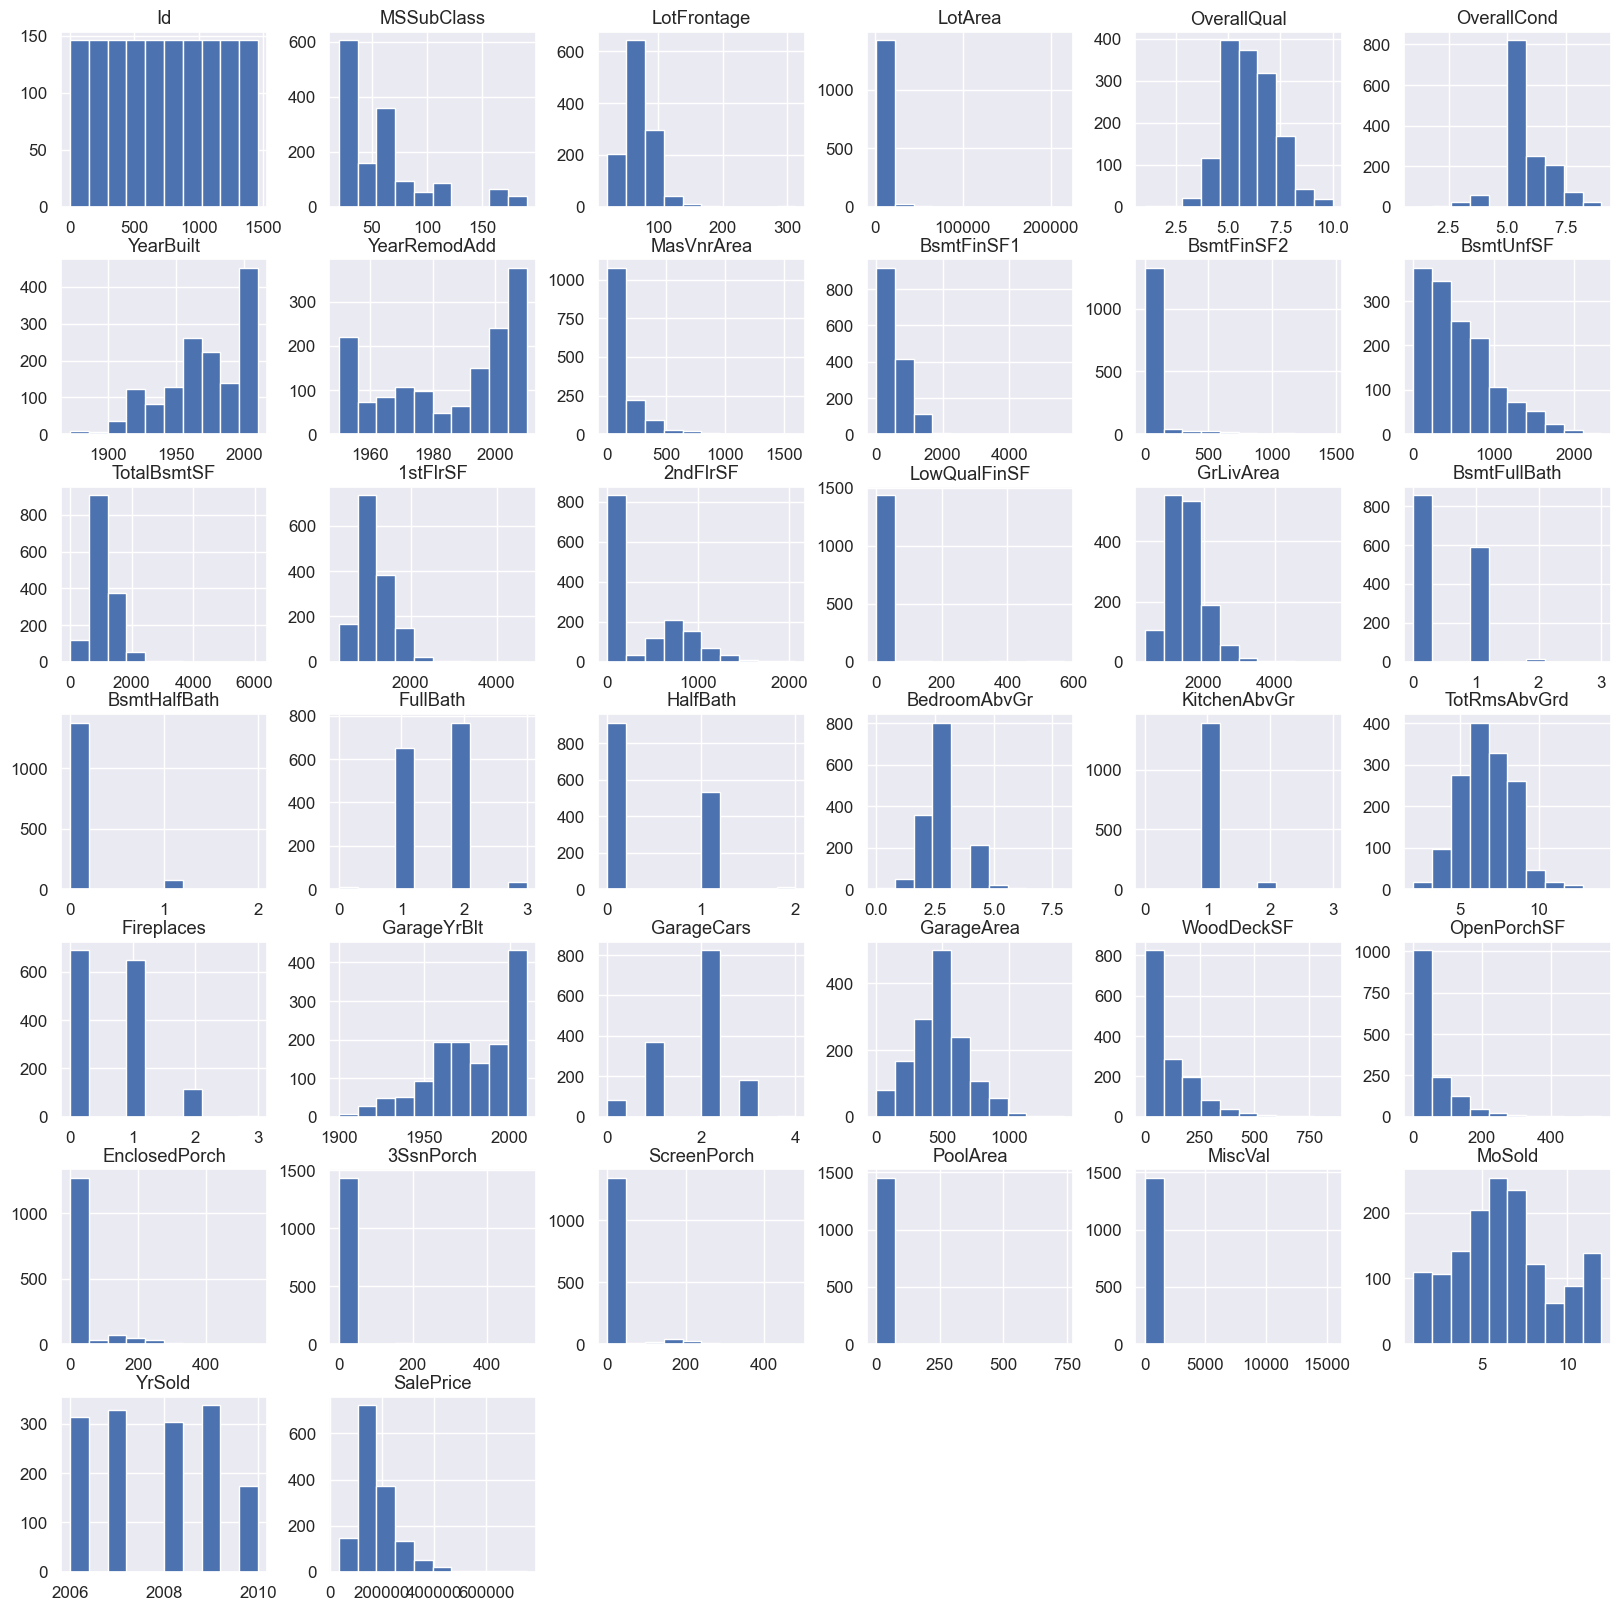

In [46]:
train.hist(figsize=(20,20))
plt.show()

# Data cleaning

In [47]:
# drop id column
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [48]:
# target variable
y = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

In [49]:
# drop duplicates
print('before: ',train_features.shape)
train_features.drop_duplicates(inplace=True)
test_features.drop_duplicates(inplace=True)
print('after: ',train_features.shape)

before:  (1460, 79)
after:  (1460, 79)


# Analyze target variable influence

C:\Users\dirkc\AppData\Local\Temp\ipykernel_28484\3908509186.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_train = train.corr()


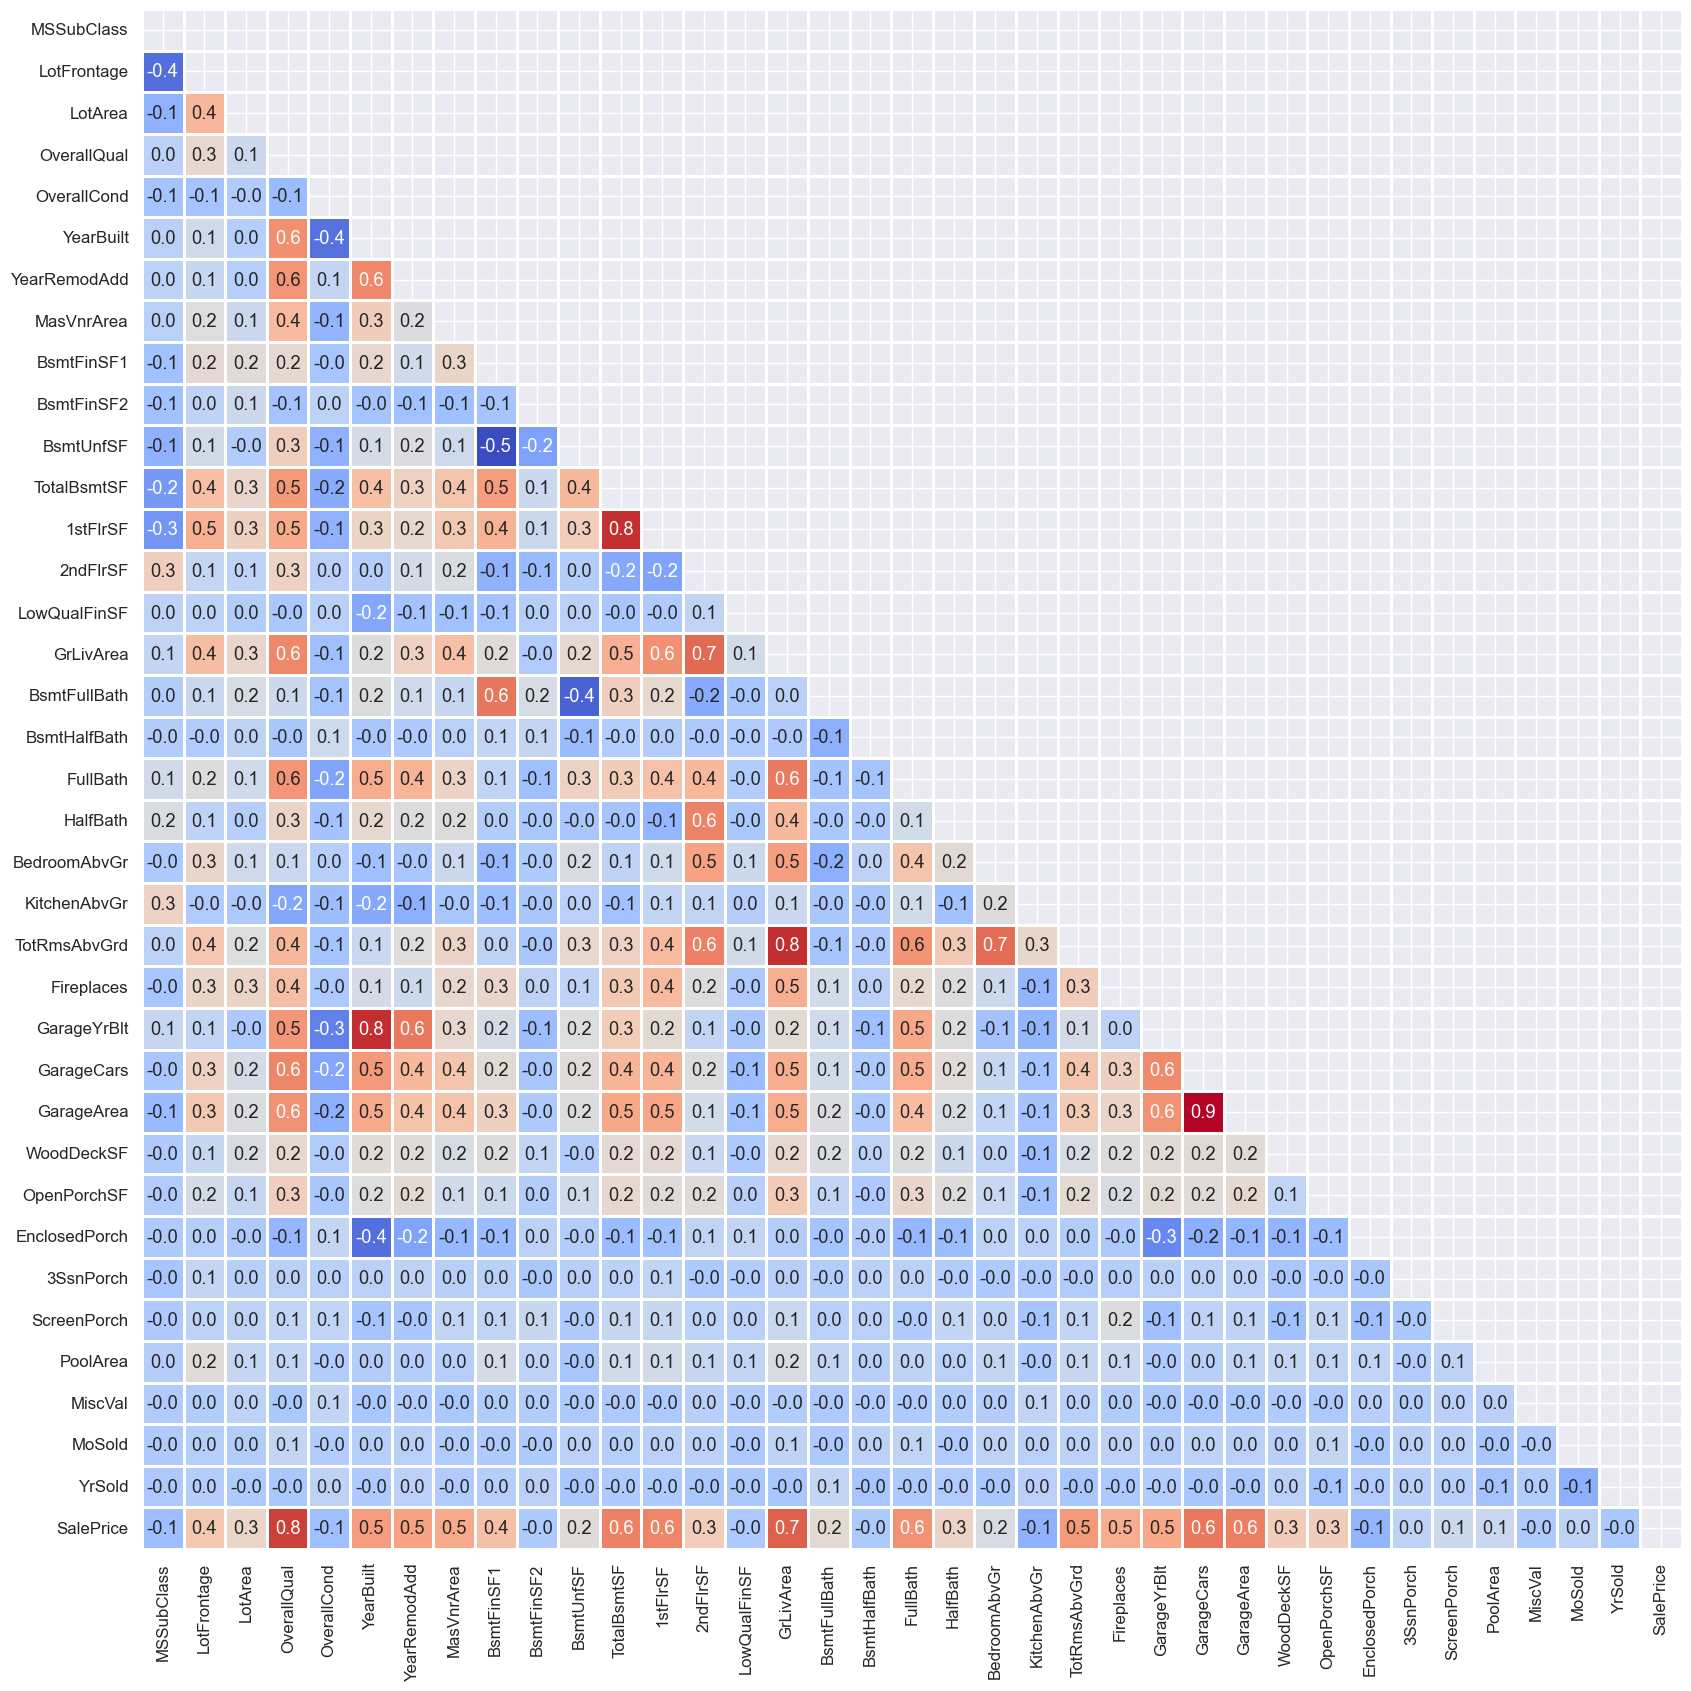

In [50]:
sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

# Analyze target variable influence
- Strong relationship overall Quality and salesPrice
- Above ground living area and salesPrice again strong relationship
- Garage features, year build, bath, rooms also influence the salesPrice
- lastly, the squared feed for given areas also influence the salesPrice

- Furthermore, Overalcondition, kitchen level and pool area seems to have less importance to the SalesPrice. This is something interested to keep in mind for the feature selection and to re-evaluate

# Data cleaning

In [51]:
features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)

(2919, 79)


In [52]:
missing = features.isna().sum().sort_values(ascending=False)
missing

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
SaleCondition       0
Length: 79, dtype: int64

In [53]:
percentage_missing = missing / len(features)
percentage_missing

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
                   ...   
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
SaleCondition    0.000000
Length: 79, dtype: float64

In [54]:
# List of 'NaN' including columns where NaN's mean none.

none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# List of 'NaN' including columns where NaN's mean 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]

In [55]:
for column in zero_cols:
    # features[column].replace(np.nan, 0, inplace=True)
    features.fillna(0)

for column in none_cols:
    # features[column].replace(np.nan, 'None', inplace=True)
    features.fillna('None')

for column in freq_cols:
    # features[column].replace(np.nan, features[column].mode()[0], inplace=True)
    features.fillna(features[column].mode()[0])

In [56]:
features['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [57]:
# fill mean value of categoricol columns

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.mode()[0]))

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))


C:\Users\dirkc\AppData\Local\Temp\ipykernel_28484\1501361773.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].apply(


In [58]:
features['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [59]:
# Features which numerical on data but should be treated as category:

features['MSSubClass'] = features['MSSubClass'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Feature engineering

In [60]:
def srt_box(y, df):

    '''A function for displaying categorical variables.'''

    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

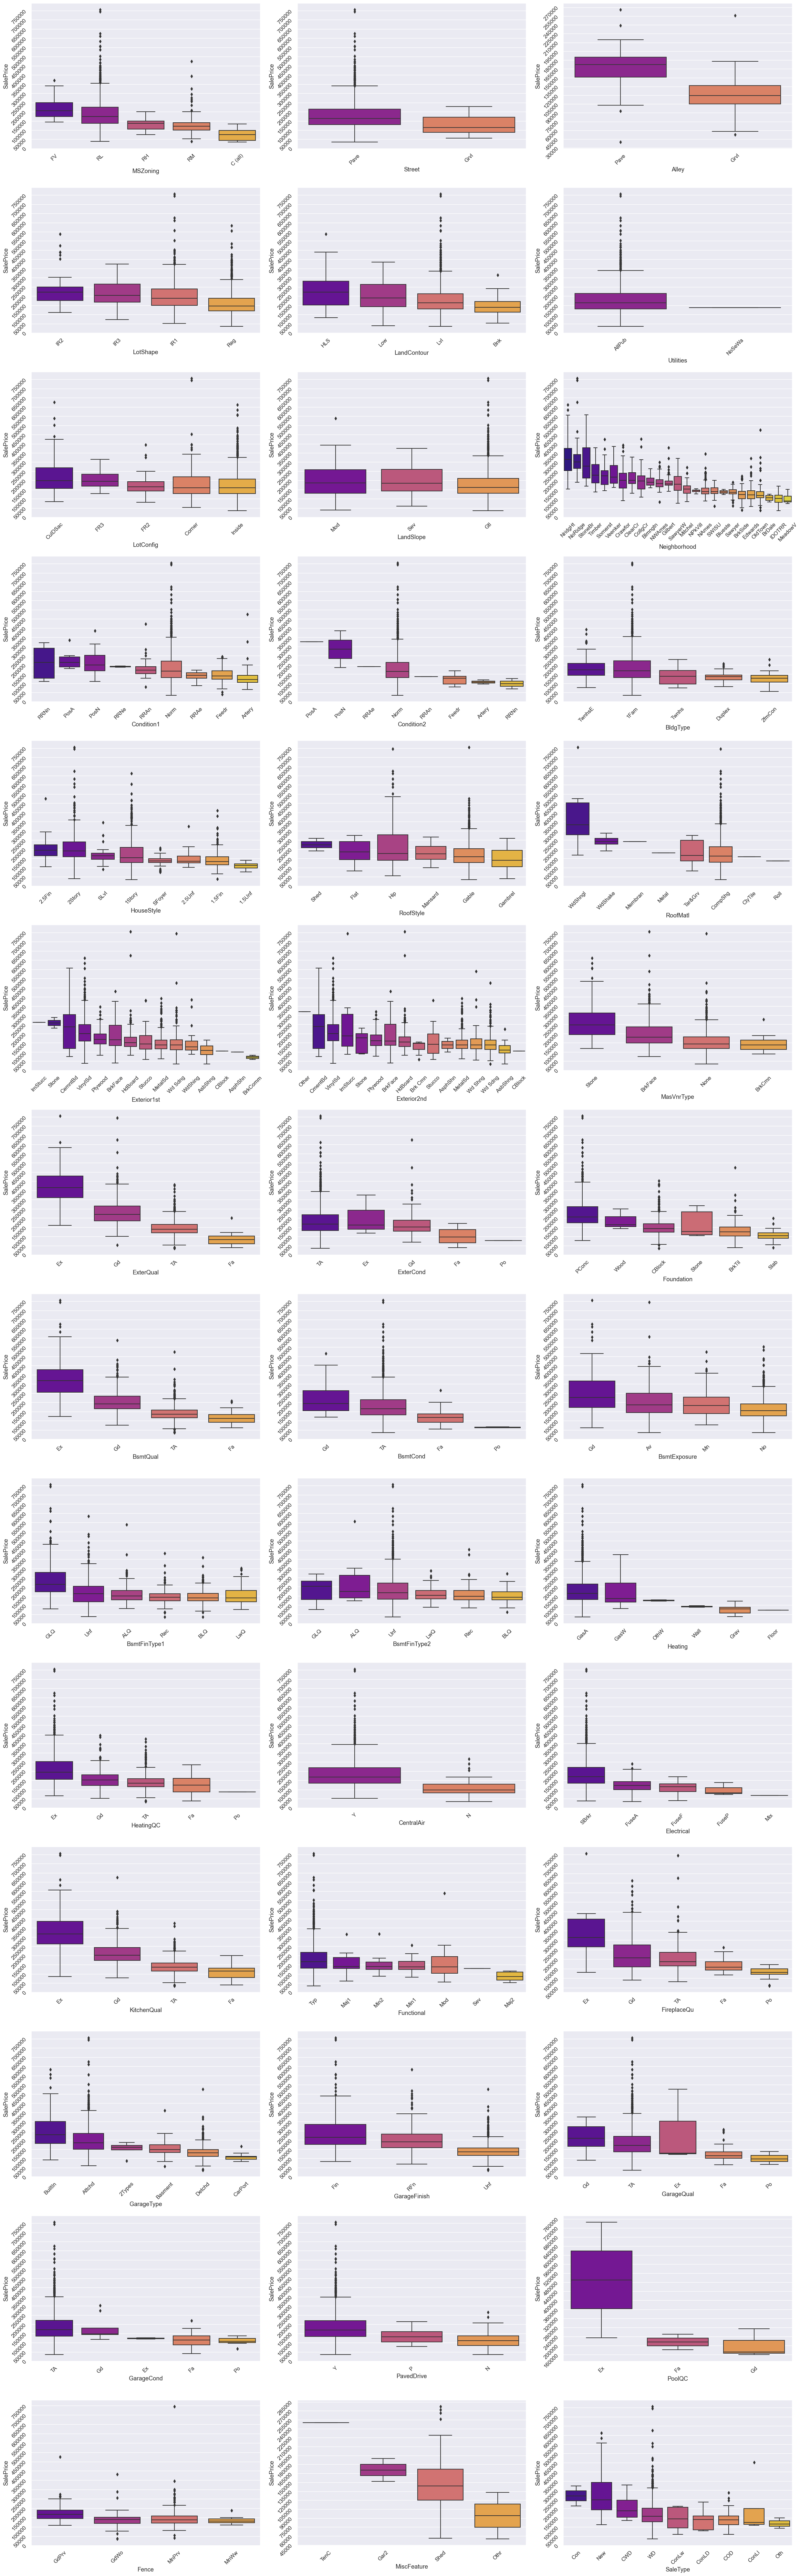

In [61]:
srt_box('SalePrice', train)

In [62]:
# Plotting numerical features with polynomial order to detect outliers by eye.

def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

C:\Users\dirkc\anaconda3\envs\HousingPrices\lib\site-packages\seaborn\regression.py:254: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\dirkc\anaconda3\envs\HousingPrices\lib\site-packages\seaborn\regression.py:254: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


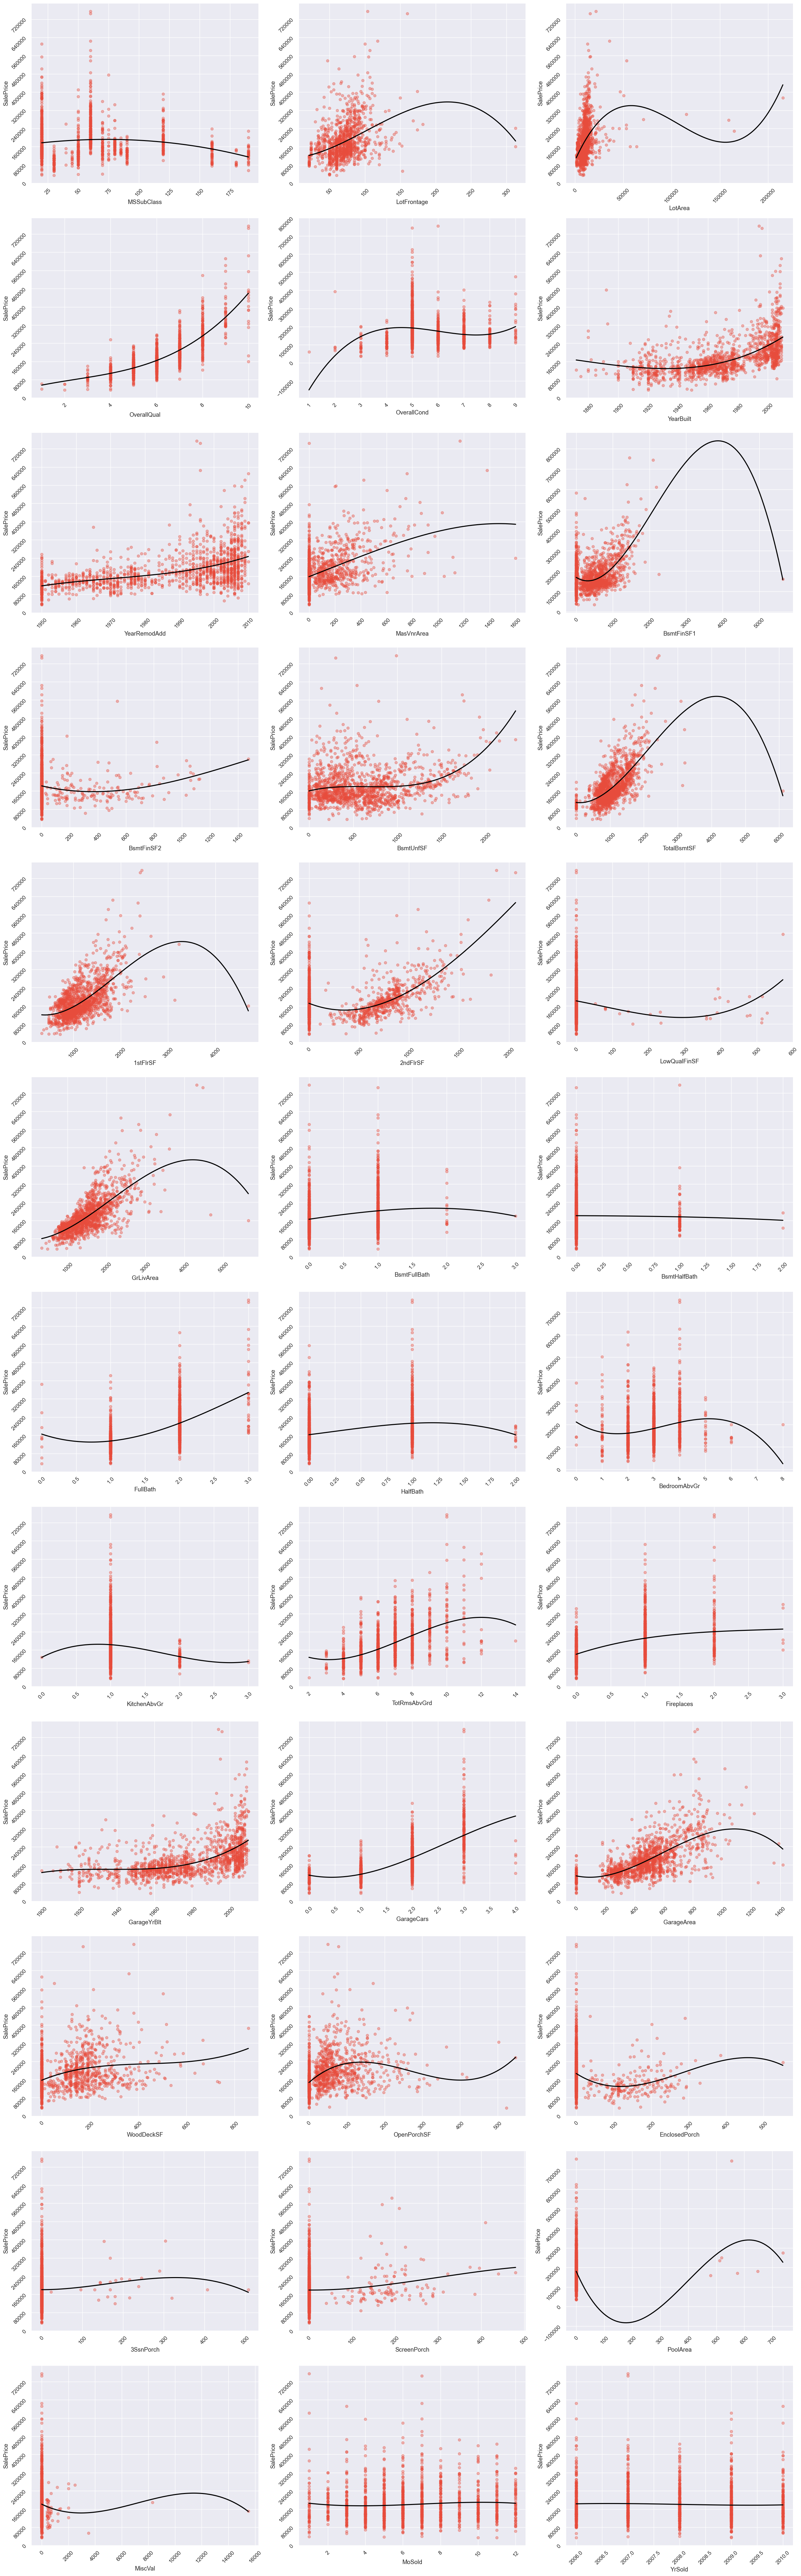

In [63]:
srt_reg('SalePrice', train)


# Prediction

In [64]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data back into train and test sets.
train, test = features.iloc[:len(y), :], features.iloc[len(y):, :]


# make dummy columns for categorical features
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# make train and test sets
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [66]:
X_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
254          70.0     8400            5            6       1957          1957   
1066         59.0     7837            6            7       1993          1994   
638          67.0     8777            5            7       1910          1950   
799          60.0     7200            5            7       1937          1950   
380          50.0     5000            5            6       1924          1950   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
254          0.0       922.0         0.0      392.0  ...               0   
1066         0.0         0.0         0.0      799.0  ...               0   
638          0.0         0.0         0.0      796.0  ...               0   
799        252.0       569.0         0.0      162.0  ...               0   
380          0.0       218.0         0.0      808.0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
254              0             0            1                      0   
1066             0             0            1                      0   
638              0             0            1                      0   
799              0             0            1                      0   
380              0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
254                       0                     0                     0   
1066                      0                     0                     0   
638                       0                     0                     0   
799                       0                     0                     0   
380                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
254                      1                      0  
1066                     1                      0  
638                      1                      0  
799                      1                      0  
380                      1                      0  

[5 rows x 317 columns]

In [67]:
# label encoded the categorical features


In [68]:
# perform regression
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge

# Linear
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_score = linear.score(X_test, y_test)
print('Linear Regression score: ', linear_score)

# Ridge
ridge = Ridge(alpha=1, fit_intercept=True)
ridge.fit(X=X_train, y=y_train)
ridge.intercept_, ridge.coef_

# Lasso

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(X_train)

#fit linear regression model
linear_model = sm.OLS(y_train, X_train).fit()

print(linear_model.summary())

ridge = sm.OLS(y_train, X_train).fit_regularized(alpha=1, L1_wt=0)

In [ ]:
# Nonlinearities - Random forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print('Random Forest score: ', rf_score)

# feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


In [ ]:
# scale all continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
